In [3]:
import pandas as pd

# Reading the CSV file into a pandas DataFrame
df = pd.read_csv('Activetion1.csv')

# Display the first 5 rows of the dataframe
df.head()


,smiles,outcome
0,C1=CC=C(C=C1)N2C(=O)C3C(C2=O)C(=NC3C4=CC=CC=N4...,Active
1,CCCCNC(=O)N(C1C(SC(=S)N1/N=C/C2=CC=C(C=C2)N(C)...,Active
2,CC1=CC(=C(S1)NC(=O)CCl)C(=O)C2=CC=CC=C2,Active
3,CCC(C)C1=CC=C(C=C1)N(C(C2=CN=CC=C2)C(=O)NC3CCC...,Active
4,COC1=C(C=C(C=C1)C2CC(=NN2C(=O)CCl)C3=CC=CS3)OC,Active


In [5]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import MACCSkeys

# Define a function to convert SMILES to MACCS fingerprint bitstring
def smiles_to_maccs(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        # Generate MACCS fingerprint for the molecule
        maccs_fp = MACCSkeys.GenMACCSKeys(mol)
        # Convert to bit string and return
        return maccs_fp.ToBitString()
    else:
        return None  # If SMILES is invalid, return None

# Step 1: Read the CSV file into a pandas DataFrame
df = pd.read_csv('Activetion1.csv')

# Step 2: Apply the conversion function to each SMILES and create a new column
df['MACCS_fingerprint'] = df['smiles'].apply(smiles_to_maccs)

# Step 3: Save the updated DataFrame to a new CSV file
df.to_csv('molecules_with_maccs_fingerprints.csv', index=False)

print("MACCS fingerprints added and saved to 'molecules_with_maccs_fingerprints.csv'")


[10:08:50] WARNING: not removing hydrogen atom without neighbors
[10:15:31] WARNING: not removing hydrogen atom without neighbors


MACCS fingerprints added and saved to 'molecules_with_maccs_fingerprints.csv'


In [7]:
import pandas as pd

# Reading the CSV file into a pandas DataFrame
df1 = pd.read_csv('molecules_with_maccs_fingerprints.csv')

# Display the first 5 rows of the dataframe
df1.head()


,smiles,outcome,MACCS_fingerprint
0,C1=CC=C(C=C1)N2C(=O)C3C(C2=O)C(=NC3C4=CC=CC=N4...,Active,0000000000000000000000000000000000000000000000...
1,CCCCNC(=O)N(C1C(SC(=S)N1/N=C/C2=CC=C(C=C2)N(C)...,Active,0000000000000100000000001000000000001110000000...
2,CC1=CC(=C(S1)NC(=O)CCl)C(=O)C2=CC=CC=C2,Active,0000000000000000000000000000000000001000000000...
3,CCC(C)C1=CC=C(C=C1)N(C(C2=CN=CC=C2)C(=O)NC3CCC...,Active,0000000000000000000000000000000000000000000000...
4,COC1=C(C=C(C=C1)C2CC(=NN2C(=O)CCl)C3=CC=CS3)OC,Active,0000000000000000000000000000000000001000000000...


# Data Perapration and CNN

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import lightgbm as lgb
import tensorflow as tf
from tensorflow.keras import layers, models

In [9]:
# Load the data from CSV file (adjust path as needed)
df = pd.read_csv('molecules_with_maccs_fingerprints.csv')

# Convert 'outcome' column to binary values
df['outcome'] = df['outcome'].map({'Active': 1, 'Inactive': 0})

# Split the MACCS fingerprint string into individual bits (as columns)
df['MACCS_fingerprint'] = df['MACCS_fingerprint'].apply(lambda x: list(map(int, x)))
fingerprint_matrix = np.array(df['MACCS_fingerprint'].tolist())

# Define features (X) and labels (y)
X = fingerprint_matrix
y = df['outcome'].values

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Define the CNN model
cnn_model = models.Sequential()

# Add a 1D Convolutional layer
cnn_model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add MaxPooling layer
cnn_model.add(layers.MaxPooling1D(pool_size=2))

# Add another convolutional layer
cnn_model.add(layers.Conv1D(filters=32, kernel_size=3, activation='relu'))

# Add a Flatten layer to convert 2D data to 1D
cnn_model.add(layers.Flatten())

# Add a Dense layer
cnn_model.add(layers.Dense(64, activation='relu'))

# Output layer (binary classification)
cnn_model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshape input data for the CNN (add channel dimension)
X_train_cnn = np.expand_dims(X_train, axis=-1)
X_test_cnn = np.expand_dims(X_test, axis=-1)

# Train the CNN model
cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on test data
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(X_test_cnn, y_test)
print(f"CNN Test Accuracy: {cnn_test_accuracy}")





Epoch 1/10


6546/6546 [==============================] - 129s 19ms/step - loss: 0.0114 - accuracy: 0.9986 - val_loss: 0.0120 - val_accuracy: 0.9984
Epoch 2/10
6546/6546 [==============================] - 136s 21ms/step - loss: 0.0104 - accuracy: 0.9986 - val_loss: 0.0118 - val_accuracy: 0.9984
Epoch 3/10
6546/6546 [==============================] - 92s 14ms/step - loss: 0.0102 - accuracy: 0.9986 - val_loss: 0.0115 - val_accuracy: 0.9984
Epoch 4/10
6546/6546 [==============================] - 63s 10ms/step - loss: 0.0100 - accuracy: 0.9986 - val_loss: 0.0114 - val_accuracy: 0.9984
Epoch 5/10
6546/6546 [==============================] - 62s 10ms/step - loss: 0.0099 - accuracy: 0.9986 - val_loss: 0.0114 - val_accuracy: 0.9984
Epoch 6/10
6546/6546 [==============================] - 66s 10ms/step - loss: 0.0096 - accuracy: 0.9986 - val_loss: 0.0115 - val_accuracy: 0.9984
Epoch 7/10
6546/6546 [==============================] - 55s 8ms/step - loss: 0.0094 - accuracy: 0.9986 - val_loss: 0.

# CNN and Save Model

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras import layers, models

# Load the data
df = pd.read_csv('molecules_with_maccs_fingerprints.csv')

# Convert 'outcome' to binary values
df['outcome'] = df['outcome'].map({'Active': 1, 'Inactive': 0})

# Split the MACCS fingerprint string into individual bits
df['MACCS_fingerprint'] = df['MACCS_fingerprint'].apply(lambda x: list(map(int, x)))
fingerprint_matrix = np.array(df['MACCS_fingerprint'].tolist())

# Define features (X) and labels (y)
X = fingerprint_matrix
y = df['outcome'].values

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input data for CNN (add channel dimension, since CNNs expect 3D inputs)
X_train_cnn = np.expand_dims(X_train, axis=-1)
X_test_cnn = np.expand_dims(X_test, axis=-1)

# CNN Model Definition
cnn_model = models.Sequential()
cnn_model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model.add(layers.MaxPooling1D(pool_size=2))
cnn_model.add(layers.Conv1D(filters=32, kernel_size=3, activation='relu'))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dense(1, activation='sigmoid'))
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
history = cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Save the trained model
cnn_model.save('cnn_maccs_model.h5')
print("CNN model saved as 'cnn_maccs_model.h5'")

# Predict on the training set
y_train_pred = (cnn_model.predict(X_train_cnn) > 0.5).astype(int)
y_train_pred = y_train_pred.flatten()

# Predict on the testing set
y_test_pred = (cnn_model.predict(X_test_cnn) > 0.5).astype(int)
y_test_pred = y_test_pred.flatten()

# Evaluate on the training set
train_loss, train_accuracy = cnn_model.evaluate(X_train_cnn, y_train)
print(f"CNN Training Accuracy: {train_accuracy}")

# Evaluate on the testing set
test_loss, test_accuracy = cnn_model.evaluate(X_test_cnn, y_test)
print(f"CNN Testing Accuracy: {test_accuracy}")

# Calculate precision, recall, and F1 score for training set
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
print(f"CNN Training Precision: {train_precision}")
print(f"CNN Training Recall: {train_recall}")
print(f"CNN Training F1 Score: {train_f1}")

# Calculate precision, recall, and F1 score for testing set
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
print(f"CNN Testing Precision: {test_precision}")
print(f"CNN Testing Recall: {test_recall}")
print(f"CNN Testing F1 Score: {test_f1}")

Epoch 1/10
6546/6546 [==============================] - 70s 11ms/step - loss: 0.0113 - accuracy: 0.9986 - val_loss: 0.0136 - val_accuracy: 0.9984
Epoch 2/10
6546/6546 [==============================] - 69s 11ms/step - loss: 0.0103 - accuracy: 0.9986 - val_loss: 0.0116 - val_accuracy: 0.9984
Epoch 3/10
6546/6546 [==============================] - 69s 11ms/step - loss: 0.0102 - accuracy: 0.9986 - val_loss: 0.0120 - val_accuracy: 0.9984
Epoch 4/10
6546/6546 [==============================] - 70s 11ms/step - loss: 0.0099 - accuracy: 0.9986 - val_loss: 0.0114 - val_accuracy: 0.9984
Epoch 5/10
6546/6546 [==============================] - 71s 11ms/step - loss: 0.0096 - accuracy: 0.9986 - val_loss: 0.0116 - val_accuracy: 0.9984
Epoch 6/10
6546/6546 [==============================] - 73s 11ms/step - loss: 0.0096 - accuracy: 0.9986 - val_loss: 0.0118 - val_accuracy: 0.9984
Epoch 7/10
6546/6546 [==============================] - 71s 11ms/step - loss: 0.0095 - accuracy: 0.9986 - val_loss: 0.0124 -

c:\Users\MK\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7273/7273 [==============================] - 21s 3ms/step - loss: 0.0083 - accuracy: 0.9986
CNN Training Accuracy: 0.9986206293106079
1819/1819 [==============================] - 6s 3ms/step - loss: 0.0107 - accuracy: 0.9986
CNN Testing Accuracy: 0.9985561966896057
CNN Training Precision: 0.5
CNN Training Recall: 0.012461059190031152
CNN Training F1 Score: 0.0243161094224924
CNN Testing Precision: 0.0
CNN Testing Recall: 0.0
CNN Testing F1 Score: 0.0


c:\Users\MK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


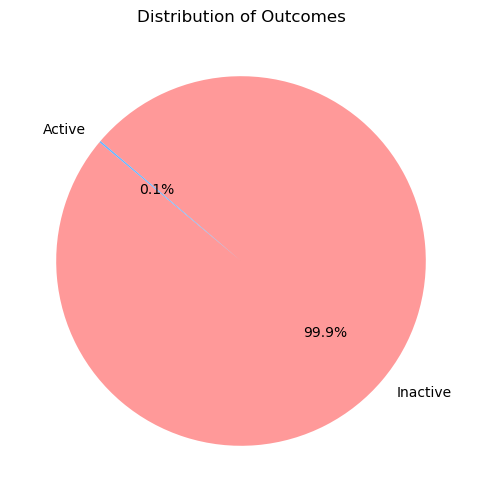

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('molecules_with_maccs_fingerprints.csv')

# Convert 'outcome' to binary values (if not already done)
df['outcome'] = df['outcome'].map({'Active': 1, 'Inactive': 0})

# Count the number of occurrences of each class
outcome_counts = df['outcome'].value_counts()

# Map the numeric values back to the original class labels
outcome_labels = {1: 'Active', 0: 'Inactive'}
outcome_labels = [outcome_labels[label] for label in outcome_counts.index]

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(outcome_counts, labels=outcome_labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=140)
plt.title('Distribution of Outcomes')
plt.show()


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras import layers, models

# Load the data
df = pd.read_csv('molecules_with_maccs_fingerprints.csv')

# Convert 'outcome' to binary values
df['outcome'] = df['outcome'].map({'Active': 1, 'Inactive': 0})

# Split the MACCS fingerprint string into individual bits
df['MACCS_fingerprint'] = df['MACCS_fingerprint'].apply(lambda x: list(map(int, x)))
fingerprint_matrix = np.array(df['MACCS_fingerprint'].tolist())

# Define features (X) and labels (y)
X = fingerprint_matrix
y = df['outcome'].values

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Reshape input data for CNN (add channel dimension, since CNNs expect 3D inputs)
X_train_cnn = np.expand_dims(X_train_resampled, axis=-1)
X_test_cnn = np.expand_dims(X_test, axis=-1)

# Compute class weights to handle class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_resampled), y=y_train_resampled)
class_weight_dict = dict(enumerate(class_weights))

# Define the CNN model
cnn_model = models.Sequential()
cnn_model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model.add(layers.MaxPooling1D(pool_size=2))
cnn_model.add(layers.Conv1D(filters=32, kernel_size=3, activation='relu'))
cnn_model.add(layers.MaxPooling1D(pool_size=2))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dense(1, activation='sigmoid'))

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model with class weights
history = cnn_model.fit(X_train_cnn, y_train_resampled, epochs=10, batch_size=32, validation_split=0.1, class_weight=class_weight_dict)

# Save the trained model
cnn_model.save('cnn_maccs_model.h5')
print("CNN model saved as 'cnn_maccs_model_ClassWeight.h5'")

# Predict on the training set
y_train_pred = (cnn_model.predict(X_train_cnn) > 0.5).astype(int).flatten()

# Predict on the testing set
y_test_pred = (cnn_model.predict(X_test_cnn) > 0.5).astype(int).flatten()

# Evaluate on the training set
train_loss, train_accuracy = cnn_model.evaluate(X_train_cnn, y_train_resampled)
print(f"CNN Training Accuracy: {train_accuracy}")

# Evaluate on the testing set
test_loss, test_accuracy = cnn_model.evaluate(X_test_cnn, y_test)
print(f"CNN Testing Accuracy: {test_accuracy}")

# Calculate precision, recall, and F1 score for training set
train_precision = precision_score(y_train_resampled, y_train_pred)
train_recall = recall_score(y_train_resampled, y_train_pred)
train_f1 = f1_score(y_train_resampled, y_train_pred)
print(f"CNN Training Precision: {train_precision}")
print(f"CNN Training Recall: {train_recall}")
print(f"CNN Training F1 Score: {train_f1}")

# Calculate precision, recall, and F1 score for testing set
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
print(f"CNN Testing Precision: {test_precision}")
print(f"CNN Testing Recall: {test_recall}")
print(f"CNN Testing F1 Score: {test_f1}")


Epoch 1/10
13073/13073 [==============================] - 129s 10ms/step - loss: 0.0726 - accuracy: 0.9742 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 2/10
13073/13073 [==============================] - 125s 10ms/step - loss: 0.0177 - accuracy: 0.9955 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 3/10
13073/13073 [==============================] - 118s 9ms/step - loss: 0.0117 - accuracy: 0.9972 - val_loss: 0.0023 - val_accuracy: 0.9989
Epoch 4/10
13073/13073 [==============================] - 120s 9ms/step - loss: 0.0090 - accuracy: 0.9977 - val_loss: 0.0053 - val_accuracy: 0.9988
Epoch 5/10
13073/13073 [==============================] - 118s 9ms/step - loss: 0.0075 - accuracy: 0.9981 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 6/10
13073/13073 [==============================] - 120s 9ms/step - loss: 0.0060 - accuracy: 0.9985 - val_loss: 0.0022 - val_accuracy: 0.9991
Epoch 7/10
13073/13073 [==============================] - 121s 9ms/step - loss: 0.0055 - accuracy: 0.9986 - va

c:\Users\MK\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



14525/14525 [==============================] - 61s 4ms/step - loss: 0.0090 - accuracy: 0.9970
CNN Training Accuracy: 0.9969512820243835
1819/1819 [==============================] - 8s 4ms/step - loss: 0.0409 - accuracy: 0.9919
CNN Testing Accuracy: 0.9919386506080627
CNN Training Precision: 0.9952527981474334
CNN Training Recall: 0.9986660527640677
CNN Training F1 Score: 0.9969565039960652
CNN Testing Precision: 0.017543859649122806
CNN Testing Recall: 0.08333333333333333
CNN Testing F1 Score: 0.028985507246376812


# LightGBM Model Implementation

In [ ]:
# Create the LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set the parameters for LightGBM
params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'learning_rate': 0.1,
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'verbose': 0
}

# Train the LightGBM model
lgb_model = lgb.train(params, train_data, valid_sets=[test_data], num_boost_round=100, early_stopping_rounds=10)

# Make predictions
lgb_train_pred = np.round(lgb_model.predict(X_train))
lgb_test_pred = np.round(lgb_model.predict(X_test))

# Calculate accuracy
lgb_train_accuracy = accuracy_score(y_train, lgb_train_pred)
lgb_test_accuracy = accuracy_score(y_test, lgb_test_pred)

print(f"LightGBM Train Accuracy: {lgb_train_accuracy}")
print(f"LightGBM Test Accuracy: {lgb_test_accuracy}")
